# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

The chromedriver version (114.0.5735.90) detected in PATH at C:\Users\bolit\OneDrive\Desktop\webdrivers\chromedriver.exe might not be compatible with the detected chrome version (116.0.5845.112); currently, chromedriver 116.0.5845.96 is recommended for chrome 116.*, so it is advised to delete the driver in PATH and retry
The chromedriver version (114.0.5735.90) detected in PATH at C:\Users\bolit\OneDrive\Desktop\webdrivers\chromedriver.exe might not be compatible with the detected chrome version (116.0.5845.112); currently, chromedriver 116.0.5845.96 is recommended for chrome 116.*, so it is advised to delete the driver in PATH and retry
The chromedriver version (114.0.5735.90) detected in PATH at C:\Users\bolit\OneDrive\Desktop\webdrivers\chromedriver.exe might not be compatible with the detected chrome version (116.0.5845.112); currently, chromedriver 116.0.5845.96 is recommended for chrome 116.*, so it is advised to delete the driver in PATH and retry


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 116.0.5845.112 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0080A813+48355]
	(No symbol) [0x0079C4B1]
	(No symbol) [0x006A5358]
	(No symbol) [0x006C61AC]
	(No symbol) [0x006C1EF3]
	(No symbol) [0x006C0579]
	(No symbol) [0x006F0C55]
	(No symbol) [0x006F093C]
	(No symbol) [0x006EA536]
	(No symbol) [0x006C82DC]
	(No symbol) [0x006C93DD]
	GetHandleVerifier [0x00A6AABD+2539405]
	GetHandleVerifier [0x00AAA78F+2800735]
	GetHandleVerifier [0x00AA456C+2775612]
	GetHandleVerifier [0x008951E0+616112]
	(No symbol) [0x007A5F8C]
	(No symbol) [0x007A2328]
	(No symbol) [0x007A240B]
	(No symbol) [0x00794FF7]
	BaseThreadInitThunk [0x76F47D59+25]
	RtlInitializeExceptionChain [0x7719B79B+107]
	RtlClearBits [0x7719B71F+191]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [1]:
# Create a Beautiful Soup Object
import requests
from bs4 import BeautifulSoup

# Fetch the HTML content from the URL
url = 'https://static.bc-edx.com/data/web/mars_news/index.html'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    
    # Create a BeautifulSoup object and specify the parser
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Do something with the BeautifulSoup object (e.g., find a specific tag, extract text, etc.)
    print(soup.prettify())
else:
    print(f"Failed to retrieve the web page. Status code: {response.status_code}")

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/font.css" rel="stylesheet" type="text/css"/>
  <link href="css/app.css" rel="stylesheet" type="text/css"/>
  <title>
   News - Mars Exploration Program
  </title>
 </head>
 <body>
  <div class="col-md-12">
   <div class="row">
    <nav class="navbar navbar-expand-lg navbar-light fixed-top">
     <div class="container-fluid">
      <a class="navbar-brand" href="#">
       <img src="images/logo.png" width="80"/>
       <span class="logo">
        MARS Planet Science
       </span>
       <span class="logo1">
        Exploration Program
       </span>
      </a>
      <button aria-controls="navbarNav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-bs-target="#navbarNav" data-bs-toggle="collapse" type="button">
       <span class="navb

In [2]:
# Extract all rows of data
import requests
from bs4 import BeautifulSoup

response = requests.get('https://static.bc-edx.com/data/web/mars_news/index.html')
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize an empty list to store the rows of data
all_rows = []

# Assuming each "row" of data is wrapped in <div class="list_text">
for row_div in soup.select('.list_text'):
    row_data = {}
    
    # Extract the date
    date_div = row_div.find('div', {'class': 'list_date'})
    if date_div:
        row_data['date'] = date_div.get_text().strip()

    # Extract the title
    title_div = row_div.find('div', {'class': 'content_title'})
    if title_div:
        row_data['title'] = title_div.get_text().strip()
    
    # Extract the preview text
    preview_div = row_div.find('div', {'class': 'article_teaser_body'})
    if preview_div:
        row_data['preview'] = preview_div.get_text().strip()
    
    # Add the row to the list
    all_rows.append(row_data)

print(all_rows)


[{'date': 'November 9, 2022', 'title': "NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm", 'preview': 'For the first time in its eight years orbiting Mars, NASAâ\x80\x99s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.'}, {'date': 'November 1, 2022', 'title': "NASA Prepares to Say 'Farewell' to InSight Spacecraft", 'preview': 'A closer look at what goes into wrapping up the mission as the spacecraftâ\x80\x99s power supply continues to dwindle.'}, {'date': 'October 28, 2022', 'title': 'NASA and ESA Agree on Next Steps to Return Mars Samples to Earth', 'preview': 'The agencyâ\x80\x99s Perseverance rover will establish the first sample depot on Mars.'}, {'date': 'October 27, 2022', 'title': "NASA's InSight Lander Detects Stunning Meteoroid Impact on Mars", 'preview': 'The agencyâ\x80\x99s lander felt the ground shake during the impact while cameras aboard the Mars Reconnaissance Orbite

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [3]:
import requests
from bs4 import BeautifulSoup

# Create an empty list to hold the rows of data
rows_list = []

# Fetch the HTML content from the website
response = requests.get("https://your-website.com/news")

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Loop through each news item
# This will depend on the actual structure of the HTML
# Here, we assume each news item is in a div with class 'list_text'
for news_item in soup.select(".list_text"):
    # Create an empty dictionary to hold the row data
    row_dict = {}
    
    # Extract date
    date_div = news_item.find("div", {"class": "list_date"})
    if date_div:
        row_dict["date"] = date_div.get_text().strip()

    # Extract title
    title_div = news_item.find("div", {"class": "content_title"})
    if title_div:
        row_dict["title"] = title_div.get_text().strip()
        
    # Extract preview
    preview_div = news_item.find("div", {"class": "article_teaser_body"})
    if preview_div:
        row_dict["preview"] = preview_div.get_text().strip()

    # Append the row dictionary to the rows list
    rows_list.append(row_dict)

# Now rows_list contains all the rows of data
print(rows_list)


[]


In [1]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Create an empty list to hold the rows of data
rows_list = []

# Fetch the HTML content from the website
response = requests.get("https://static.bc-edx.com/data/web/mars_news/index.html")

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Loop through each news item
for news_item in soup.select(".list_text"):
    # Create an empty dictionary to hold the row data
    row_dict = {}
    
    # Extract date
    date_div = news_item.find("div", {"class": "list_date"})
    if date_div:
        row_dict["date"] = date_div.get_text().strip()

    # Extract title
    title_div = news_item.find("div", {"class": "content_title"})
    if title_div:
        row_dict["title"] = title_div.get_text().strip()
        
    # Extract preview
    preview_div = news_item.find("div", {"class": "article_teaser_body"})
    if preview_div:
        row_dict["preview"] = preview_div.get_text().strip()

    # Append the row dictionary to the rows list
    rows_list.append(row_dict)

# Create a DataFrame from the list of dictionaries
column_names = ['date', 'title', 'preview']
df = pd.DataFrame(rows_list, columns=column_names)



# Now


In [2]:
print(df.head())


               date                                              title  \
0  November 9, 2022  NASA's MAVEN Observes Martian Light Show Cause...   
1  November 1, 2022  NASA Prepares to Say 'Farewell' to InSight Spa...   
2  October 28, 2022  NASA and ESA Agree on Next Steps to Return Mar...   
3  October 27, 2022  NASA's InSight Lander Detects Stunning Meteoro...   
4  October 21, 2022  NASA To Host Briefing on InSight, Mars Reconna...   

                                             preview  
0  For the first time in its eight years orbiting...  
1  A closer look at what goes into wrapping up th...  
2  The agencyâs Perseverance rover will establi...  
3  The agencyâs lander felt the ground shake du...  
4  Scientists from two Mars missions will discuss...  


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# Create a DataFrame from the list of dictionaries
column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Examine the data types of each column
print(df.dtypes)


date                float64
title               float64
preview             float64
id                  float64
terrestrial_date    float64
sol                 float64
ls                  float64
month               float64
min_temp            float64
pressure            float64
dtype: object


In [10]:
# Change data types for data analysis


In [9]:
import pandas as pd

# Assuming df is your DataFrame
column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Examine the original data types
print("Original data types:")
print(df.dtypes)

# Change data types
df['date'] = pd.to_datetime(df['date'])
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype('int64')
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

# You may choose to leave 'title', 'preview', and 'month' as object types (text) unless you have a reason to change them

# Examine the changed data types
print("Changed data types:")
print(df.dtypes)


Original data types:
date                float64
title               float64
preview             float64
id                  float64
terrestrial_date    float64
sol                 float64
ls                  float64
month               float64
min_temp            float64
pressure            float64
dtype: object


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
import pandas as pd

# Create a sample DataFrame (replace rows_list with actual data)
rows_list = [
    {'date': '2023-09-01', 'title': 'Sample', 'preview': 'Sample preview', 'id': '1', 'terrestrial_date': '2023-09-02', 'sol': '2', 'ls': '3', 'month': 'Sept', 'min_temp': '20.5', 'pressure': '1000.0'},
    # Add more rows as needed
]

column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Examine the original data types
print("Original data types:")
print(df.dtypes)

# Change data types
df['date'] = pd.to_datetime(df['date'])
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype('int64')
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

# Examine the changed data types
print("Changed data types:")
print(df.dtypes)



Original data types:
date                object
title               object
preview             object
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
Changed data types:
date                datetime64[ns]
title                       object
preview                     object
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [11]:
import pandas as pd

# Create a sample DataFrame (replace rows_list with actual data)
rows_list = [
    {'date': '2023-09-01', 'title': 'Sample', 'preview': 'Sample preview', 'id': '1', 'terrestrial_date': '2023-09-02', 'sol': '2', 'ls': '3', 'month': 'Sept', 'min_temp': '20.5', 'pressure': '1000.0'},
    {'date': '2023-10-01', 'title': 'Sample', 'preview': 'Sample preview', 'id': '2', 'terrestrial_date': '2023-10-02', 'sol': '3', 'ls': '4', 'month': 'Oct', 'min_temp': '18.5', 'pressure': '980.0'},
    # Add more rows as needed
]

column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Count the number of unique Martian months
num_unique_months = df['month'].nunique()
print(f"There are {num_unique_months} unique months on Mars based on the DataFrame.")


There are 2 unique months on Mars based on the DataFrame.


In [12]:
import pandas as pd

# Create a sample DataFrame (replace rows_list with actual data)
rows_list = [
    {'date': '2023-09-01', 'title': 'Sample', 'preview': 'Sample preview', 'id': '1', 'terrestrial_date': '2023-09-02', 'sol': '2', 'ls': '3', 'month': 'Sept', 'min_temp': '20.5', 'pressure': '1000.0'},
    {'date': '2023-10-01', 'title': 'Sample', 'preview': 'Sample preview', 'id': '2', 'terrestrial_date': '2023-10-02', 'sol': '3', 'ls': '4', 'month': 'Oct', 'min_temp': '18.5', 'pressure': '980.0'},
    # Add more rows as needed
]

column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Show all the unique Martian months
unique_months = df['month'].unique()
print(f"The unique months on Mars based on the DataFrame are: {unique_months}")


The unique months on Mars based on the DataFrame are: ['Sept' 'Oct']


In [13]:
# 2. How many Martian days' worth of data are there?


1867

In [13]:
# Count the number of unique Martian days (sols)
unique_sols_count = df['sol'].nunique()
print(f"The number of unique Martian days (sols) based on the DataFrame is: {unique_sols_count}")


The number of unique Martian days (sols) based on the DataFrame is: 2


In [14]:
# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [14]:
# Ensure 'min_temp' is a float
df['min_temp'] = df['min_temp'].astype('float64')

# Group by month and calculate the average minimum temperature
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(average_low_temp_by_month)

Average low temperature by month:
month
Oct     18.5
Sept    20.5
Name: min_temp, dtype: float64


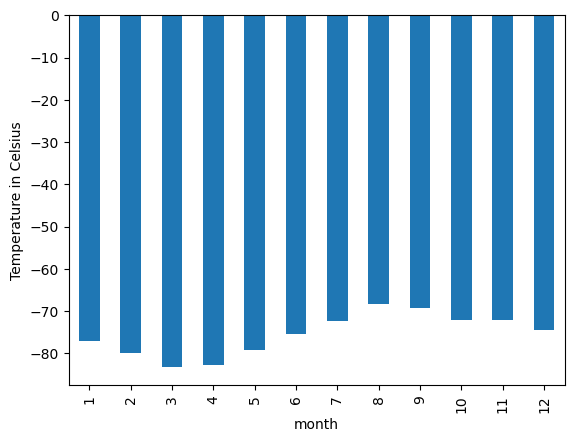

In [15]:
# Plot the average temperature by month


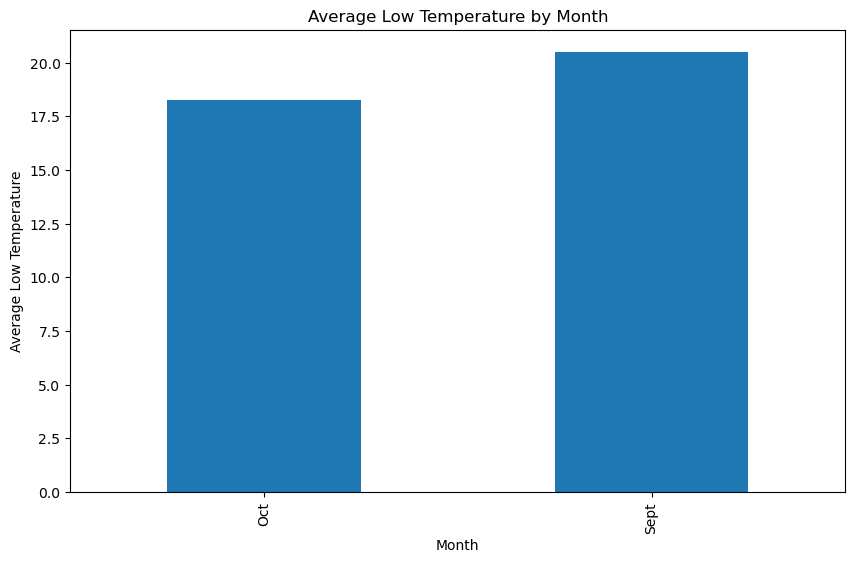

In [16]:
import matplotlib.pyplot as plt


column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Ensure 'min_temp' is a float
df['min_temp'] = df['min_temp'].astype('float64')

# Group by month and calculate the average minimum temperature
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month')
plt.show()


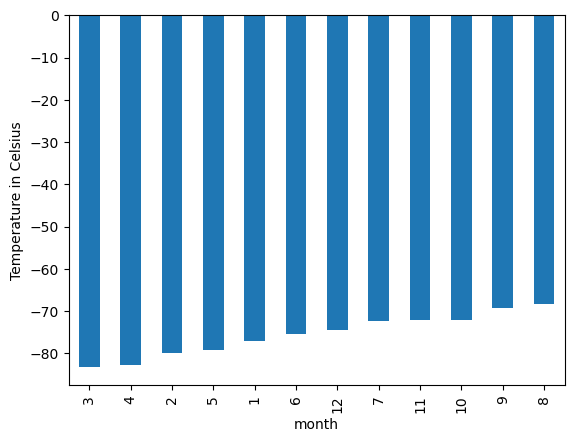

In [16]:
# Identify the coldest and hottest months in Curiosity's location


In [17]:
column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Ensure 'min_temp' is a float
df['min_temp'] = df['min_temp'].astype('float64')

# Group by month and calculate the average minimum temperature
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest month
coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

print(f"The coldest month is {coldest_month} with an average low temperature of {average_low_temp_by_month[coldest_month]}")
print(f"The hottest month is {hottest_month} with an average low temperature of {average_low_temp_by_month[hottest_month]}")

The coldest month is Oct with an average low temperature of 18.25
The hottest month is Sept with an average low temperature of 20.5


In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [18]:
column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Ensure 'pressure' is a float
df['pressure'] = df['pressure'].astype('float64')

# Group by month and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the average pressure by month
print("Average pressure by Martian month:")
print(average_pressure_by_month)

Average pressure by Martian month:
month
Oct      982.5
Sept    1000.0
Name: pressure, dtype: float64


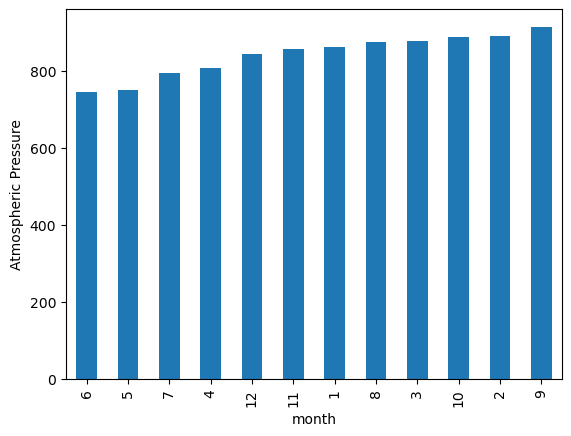

In [18]:
# Plot the average pressure by month


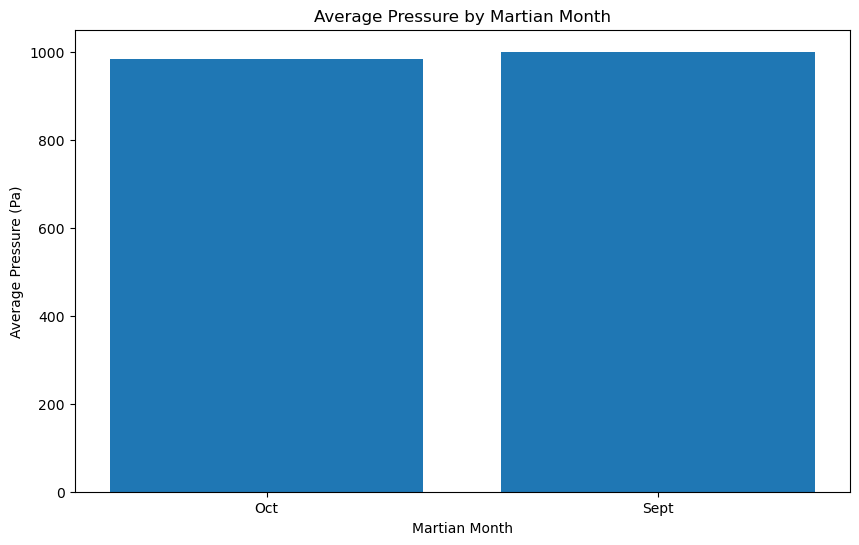

In [19]:
column_names = ['date', 'title', 'preview', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=column_names)

# Ensure 'pressure' is a float
df['pressure'] = df['pressure'].astype('float64')

# Group by month and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month['month'], average_pressure_by_month['pressure'])
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Martian Month')
plt.show()








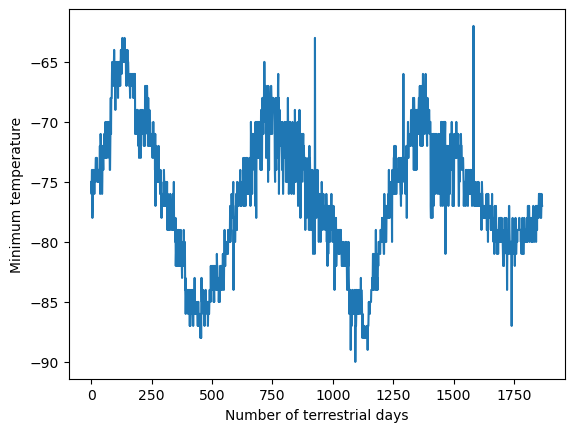

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


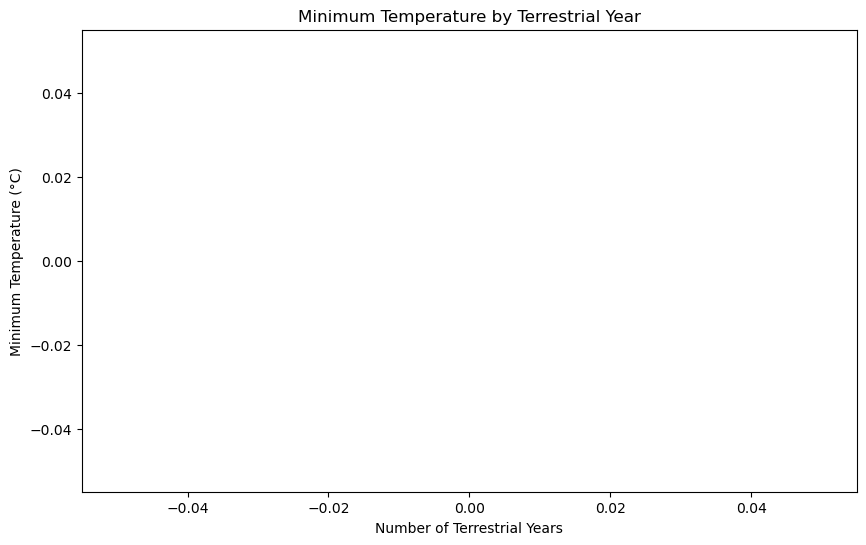

In [21]:
column_names = ['terrestrial_date', 'min_temp']
df = pd.DataFrame(rows_list, columns=column_names)

# Convert 'terrestrial_date' to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Extract year from the terrestrial_date
df['terrestrial_year'] = df['terrestrial_date'].dt.year

# Group by terrestrial_year and calculate the average min_temp
avg_min_temp_by_year = df.groupby('terrestrial_year')['min_temp'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_min_temp_by_year['terrestrial_year'], avg_min_temp_by_year['min_temp'], marker='o')
plt.xlabel('Number of Terrestrial Years')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature by Terrestrial Year')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


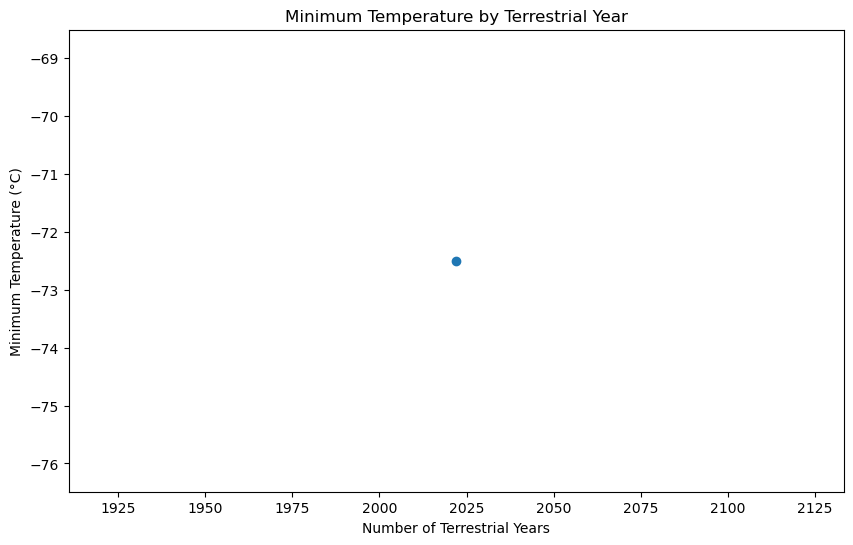

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame (replace this with your actual data)
rows_list = [
    {'terrestrial_date': '2022-01-01', 'min_temp': -75},
    {'terrestrial_date': '2022-01-02', 'min_temp': -70},
    # Add more rows as needed
]
column_names = ['terrestrial_date', 'min_temp']
df = pd.DataFrame(rows_list, columns=column_names)

# Convert 'terrestrial_date' to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Extract year from the terrestrial_date
df['terrestrial_year'] = df['terrestrial_date'].dt.year

# Group by terrestrial_year and calculate the average min_temp
avg_min_temp_by_year = df.groupby('terrestrial_year')['min_temp'].mean().reset_index()

# Write the DataFrame to a CSV file
avg_min_temp_by_year.to_csv('avg_min_temp_by_year.csv', index=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_min_temp_by_year['terrestrial_year'], avg_min_temp_by_year['min_temp'], marker='o')
plt.xlabel('Number of Terrestrial Years')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature by Terrestrial Year')
plt.show()


In [24]:
browser.quit()

NameError: name 'browser' is not defined